<a href="https://colab.research.google.com/github/owaisahmad315/pandas/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
songs_66 = pd.Series([3, None , 11, 9],
                     index=['George', 'Ringo', 'John', 'Paul'],
                    name='Counts')
songs_66


George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [3]:
# One of the most basic measurements is the sum of the values in a series:
songs_66.sum()

23.0

In [4]:
songs_66.mean()

7.666666666666667

In [5]:
songs_66.median()

9.0

In [6]:
songs_66.quantile()

9.0

In [7]:
songs_66.quantile(.1)

4.2

In [8]:
songs_66.quantile(.9)

10.6

In [9]:
"""
To get a good overall feel for the series, the .describe method presents
a good number of summary statistics and returns the result as a series. It
includes the count of values, their mean, standard deviation, minimum and
maximum values, and the 25%, 50%, and 75% quantiles:
"""

songs_66.describe()

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
25%       6.000000
50%       9.000000
75%      10.000000
max      11.000000
Name: Counts, dtype: float64

In [10]:
"""
You can pass in specific percentiles if you so desire with the
percentiles parameter:
"""
songs_66.describe(percentiles= [0.5, .1, .2])

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
10%       4.200000
20%       5.400000
50%       9.000000
max      11.000000
Name: Counts, dtype: float64

In [11]:
"""
The series also has methods to find the minimum and maximum for the
values, .min and .max. In addition, there are methods to get the index
location of the minimum and maximum index labels, .idxmin and
.idxmax:

"""
songs_66.min()

3.0

In [12]:
songs_66.idxmin()

'George'

In [13]:
songs_66.max()

11.0

In [14]:
songs_66.idxmax()

'John'

In [15]:
# Variance
songs_66.var()

17.333333333333336

In [16]:
# standard deviation
songs_66.std()

4.163331998932266

In [17]:
# mean absolute deviation
songs_66.mad()

<ipython-input-17-91256c111dc0>:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  songs_66.mad()


3.1111111111111107

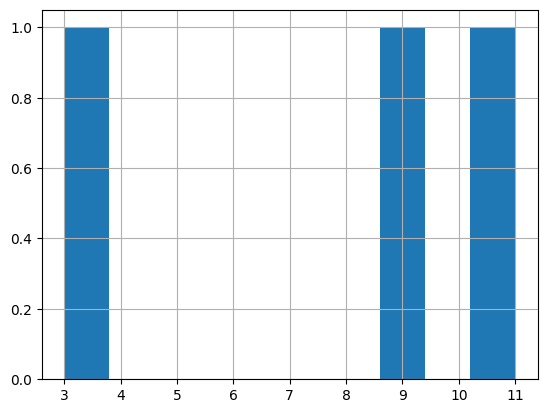

In [18]:
"""
Skew is a summary statistic that measures how the tails behave. A
normal distribution should have a skew around 0. A negative skew
indicates that the left tail is longer, whereas a positive skew indicates that
the right tail is longer. Below is a plot of the histogram:

"""
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
songs_66.hist(ax=ax)
fig.savefig('/tmp/song-hist.png')


In [19]:
songs_66.skew()

-1.293342780733397

In [20]:
"""
Kurtosis is a summary measure that describes how narrow the “peak” of
is distribution is. The larger the number, the narrower the peak is.
Normally, this value is reported alongside skew. The .kurt method returns
nan if there are fewer than four numbers:

"""
songs_66.kurt()

nan

In [21]:
songs_69 = pd.Series([18, 22, 7, 5],
                      index=[ 'John', 'Paul', 'George', 'Ringo'],
                      name='Counts')


In [22]:
"""
Covariance is a measure of how two variables change together. If they
tend to increase together, it will be positive. If one tends to decrease while
the other increases, it will be negative:

"""
songs_66.cov(songs_69)

28.333333333333332

In [23]:
"""
When the covariance is normalized (by dividing by the standard
deviations of both series), it is called the correlation coefficient. The .corr
method gives the Pearson Correlation Coefficient. This value is a number
from -1 to 1. The more positive this value is, the greater the correlation.
The more negative it is, the greater the inverse correlation. A value of zero
indicates no correlation:

"""
songs_66.corr(songs_69)

0.8761489936497804

In [24]:
"""
The autocorrelation measure describes the correlation of a series with
itself shifted one position. 1 indicates perfect correlation, and -1 indicates
anti-correlation. Here is another case where the sample size is small, so
take these with a grain of salt. Note that .autocorr does not ignore NaN
by default:

"""
songs_66.autocorr()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


nan

In [25]:
songs_66.dropna().autocorr()

-0.9999999999999999

## Convert **Types**

In [26]:
songs_66.round()

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [27]:
"""
Note that even though the value is rounded, the type is still a float.
Numbers can be clipped between lower and upper thresholds using the
.clip method. This method does not change the type either:

"""
songs_66.clip(lower=80, upper = 90)

George    80.0
Ringo      NaN
John      80.0
Paul      80.0
Name: Counts, dtype: float64

In [28]:
"""
The .astype method attempts to convert values to the type passed in. In
the instance below, the float values are being converted to strings. To the
unwary, there does not appear to be much change other than the dtype
changing to object:
"""
songs_66.astype(str)

George     3.0
Ringo      nan
John      11.0
Paul       9.0
Name: Counts, dtype: object

In [29]:
"""
But, if a method is invoked on the converted string values, the result
might not be the desired output. In this case .max now returns the
lexicographic maximum:
"""
songs_66.astype(str).max()

'nan'

In [ ]:
"""
By default, the to_* functions will raise an error if they cannot coerce.
In the case below, the to_numeric function cannot convert nan to a float.
This is slightly annoying:

"""
pd.to_numeric(songs_66.apply(str))

In [31]:
"""
Luckily, the to_numeric function has an errors parameter, that when
passed 'coerce' will fill in with NaN if it cannot coerce:

"""
pd.to_numeric(songs_66.apply(str), errors= 'coerce')

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [ ]:
"""
The to_datetime function also behaves similarly, and also raises errors
when it fails to coerce:
"""
pd.to_datetime(pd.Series(['Sep 7, 2001',
                      '9/8/2001', '9-9-2001', '10th of September 2001',
                      'Once de Septiembre 2001']))

In [33]:
"""
If we pass errors='coerce', we can see that it supports many formats
if, but not Spanish:

"""

pd.to_datetime(pd.Series(['Sep 7, 2001',
                      '9/8/2001', '9-9-2001', '10th of September 2001',
                      'Once de Septiembre 2001']),
           errors='coerce')

0   2001-09-07
1   2001-09-08
2   2001-09-09
3   2001-09-10
4          NaT
dtype: datetime64[ns]

## **Dealing with None**

In [ ]:
"""
The
.fillna method will replace them with a given value, -1 in this case:
"""
songs_66.fillna(-1)

In [36]:
# NaN values can be dropped from the series using .dropna:
songs_66.dropna()

George     3.0
John      11.0
Paul       9.0
Name: Counts, dtype: float64

## **Matrix Operations**

In [37]:
"""
Computing the dot product is available through the .dot method. But, this
method fails if NaN is part of the series:

"""
songs_66.dot(songs_69)

nan

In [38]:
songs_66.dropna().dot(songs_66.dropna())

211.0

In [39]:
"""
A series also has a .transpose method (alternatively invoked as the T
property) that is actually a no-op and just returns the series. (In the two
dimensional data frame, the columns and rows are transposed):

"""
songs_66.T

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

## Append, combining, and joining two series

In [40]:
"""
To concatenate two series together, simply use the pd.concat method.
Unlike the .append method of a Python list which takes a single item to be
appended to the list, this method takes another Series object as its’
parameter:
"""
concatenated = pd.concat([songs_66,songs_69])
concatenated

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
John      18.0
Paul      22.0
George     7.0
Ringo      5.0
Name: Counts, dtype: float64

In [ ]:
"""
The .append method will create duplicate indexes by default (as seen by
the multiple entries for Paul above). .append has an optional parameter,
verify_integrity, which when set to True to complain if index values
are duplicated:

"""
songs_66.append(songs_69, verify_integrity= True)




In [42]:
"""
To perform element-wise operations on series, use the .combine
method. It takes another series, and a function as its’ parameters. The
61
function should accept two parameters and perform a reduction on them.
Below is one way to compute the average of two series using .combine:
"""
def avg(v1, v2):
  return (v1 + v2) /2.0
songs_66.combine(songs_69, avg)

George     5.0
John      14.5
Paul      15.5
Ringo      NaN
Name: Counts, dtype: float64

In [43]:
"""
To update values from one series, use the .update method. It accepts a
new series and will return a series that has replaced the values using the
passed in series:
"""
songs_66.update(songs_69)
songs_66

George     7.0
Ringo      5.0
John      18.0
Paul      22.0
Name: Counts, dtype: float64

In [44]:
# The .repeat method simply repeats every item a desired amount:
songs_66.repeat(2)

George     7.0
George     7.0
Ringo      5.0
Ringo      5.0
John      18.0
John      18.0
Paul      22.0
Paul      22.0
Name: Counts, dtype: float64

##Sorting

In [45]:
songs_66

George     7.0
Ringo      5.0
John      18.0
Paul      22.0
Name: Counts, dtype: float64

In [49]:
orig = songs_66.copy()


In [52]:
songs_66.sort_values()
songs_66

George     7.0
Ringo      5.0
John      18.0
Paul      22.0
Name: Counts, dtype: float64

In [53]:
orig.sort_values()

Ringo      5.0
George     7.0
John      18.0
Paul      22.0
Name: Counts, dtype: float64

In [54]:
"""
The .sort_index method does not operate in place and returns a new
series. It has an optional parameter, ascending that will reverse the index
if desired:
"""
songs_66.sort_index()

George     7.0
John      18.0
Paul      22.0
Ringo      5.0
Name: Counts, dtype: float64

In [57]:
songs_66.sort_index(ascending = False)

Ringo      5.0
Paul      22.0
John      18.0
George     7.0
Name: Counts, dtype: float64

In [58]:
"""
Another useful sorting related method is .rank. This method ranks the
index by the values of the entries. It assigns equal weights for ties. It also
supports the ascending parameter to reverse the order:
"""
songs_66.rank()

George    2.0
Ringo     1.0
John      3.0
Paul      4.0
Name: Counts, dtype: float64

##Applying a function

In [59]:
"""
Often the values in a series will need to be altered, cleaned up, checked, or
have an arbitrary function applied to them. The .map method applies a
function to every item in the series. Below is a function, format, that
creates a string that appends song or songs to the number depending on
the count:

"""
def format(x):
  if x == 1:
    template = '{} song'
  else:
    template = '{} songs'
  return template.format(x)

In [60]:
songs_66.map(format)

George     7.0 songs
Ringo      5.0 songs
John      18.0 songs
Paul      22.0 songs
Name: Counts, dtype: object